# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake


## Data Validation

This data set has 947 rows, 8 columns.

- Calories: Numeric Values, with 52 missing values.
- Carbohydrate: Numeric Values, with 52 missing values.
- Sugar: Numeric Values, with 52 missing values.
- Protein: Numeric Values, with 52 missing values.
- Category: 11 categories without missing values.
- Servings: 6 unique values without missing values.
- High traffic: 1 category with 373 missing values, the missing values means the recipe didn't generate high traffic, the Value 'High' will be encoded as 1 and the Null values with 0.


The missing values in the first 4 numerical columns represents more than 5% of total values, so we need to impute them. I used the mean of the specefic category that the missing value belong to, because the mean values differ significantly from category to another, this process will preserve the mean value for each category and their ditribution. 

## Exploratory Analysis


### High Traffic
I have investigated the target variable and features of the recipe, and the relationship between target variable and features, as shown in the boxplots below:
![boxplot_1](box_plot_calories.png)
![boxplot_2](box_plot_carbohydrate.png)
![boxplot_3](box_plot_protein.png)
![boxplot_4](box_plot_sugar.png)


### Numeric varibales - Calories, Carbohydrate, Sugar, Protein

From the heatmap below, we can conclude that there is no linear relationship between the pairs of variables.

![HeatMap](heatmap.png)


### Categorical Variables - Catogory, Servings

From the bar plot below, the most common category is Breakfast and the most common number of serving is 4.

![category](category_count.png)
![servings](servings_count.png)

### Relationship between Calorie, Carbohydrate, Sugar, Protein and High Traffic

From the boxplots we can see there's no significant difference in distribution of High Traffic among each categories in each variable.

### Model Fitting and Evaluation

Predicting if a recipe is gonna generate high traffic is a classification problem. As first Model I'm choosing Decision Random Forst, Because it can capture complex relationships in the data and can provide with us we feature importance, as for the comparsion I choose k-nearest neighbors, For evaluation I'm chossing the accuracy score and presicion because we want to avoid to put recipe that doesn't gonna generate traffic on the home page(False Positive).

### Prepare Data For Modeling

To enable modelling, I chose Calories, Carbohydrate, Sugar, Protein, Category and Servings  as features, High Traffic as target variable. I also have made the following changes:
- Normalize the numeric features.
- Convert the categorical variables into numeric features.
- Split the data into a training set and a test set




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('recipe_site_traffic_2212.csv')

In [3]:
df.shape

(947, 8)

In [4]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


We drop the recipe column as it's not needed.

In [6]:
df = df.drop('recipe', axis=1)

In [7]:
df.describe()

,calories,carbohydrate,sugar,protein
count,895.000000,895.000000,895.000000,895.000000
mean,435.939196,35.069676,9.046547,24.149296
std,453.020997,43.949032,14.679176,36.369739
min,0.140000,0.030000,0.010000,0.000000
25%,110.430000,8.375000,1.690000,3.195000
50%,288.550000,21.480000,4.550000,10.800000
75%,597.650000,44.965000,9.800000,30.200000
max,3633.160000,530.420000,148.750000,363.360000


We count missing values in each category.

In [8]:
df.isna().sum()

calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

We vesualize how the missing values distribute throughout our data, we notice that we are missing values for each recipe 

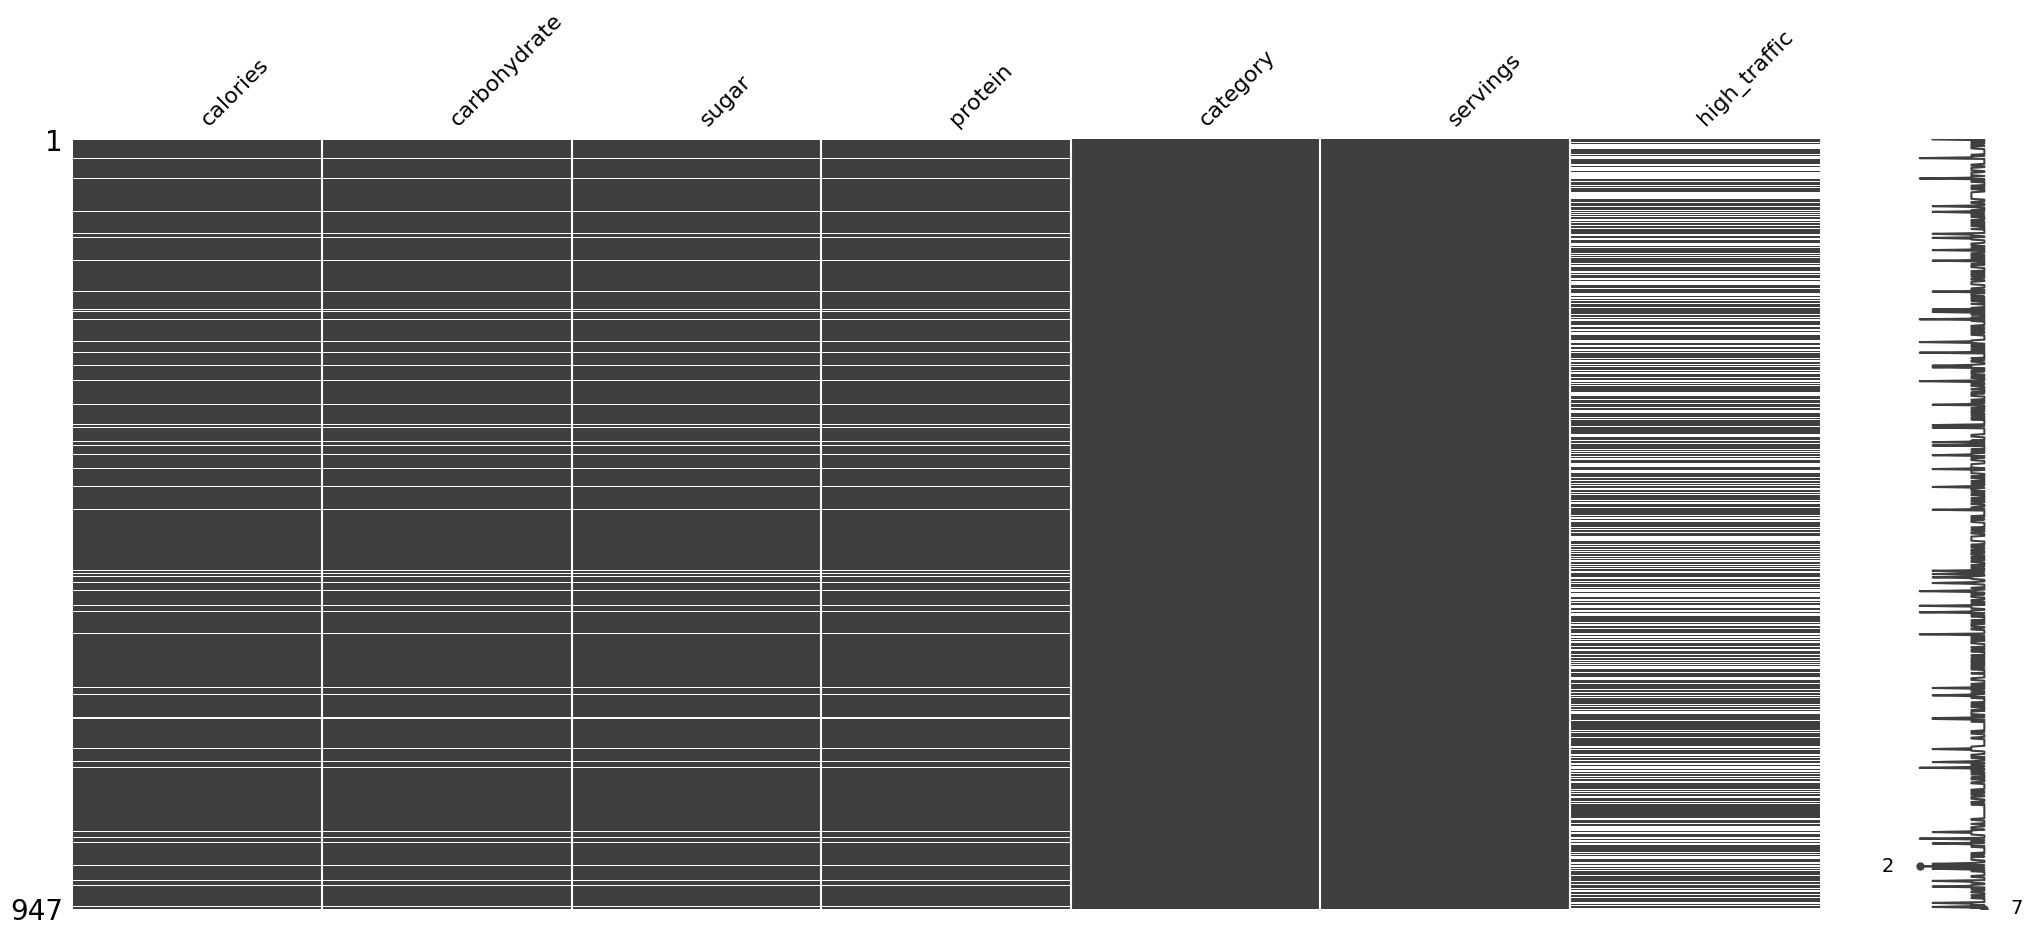

In [9]:
import missingno as msno

msno.matrix(df)
plt.show()


We impute the missing values with the mean of each category that specific column belongs to. 

In [10]:
category_means = df.groupby('category').mean()

for index, row in df.iterrows():
    category = row['category']
    if pd.isnull(row['calories']):
        df.loc[index, 'calories'] = category_means.loc[category, 'calories']
    if pd.isnull(row['carbohydrate']):
        df.loc[index, 'carbohydrate'] = category_means.loc[category, 'carbohydrate']
    if pd.isnull(row['sugar']):
        df.loc[index, 'sugar'] = category_means.loc[category, 'sugar']
    if pd.isnull(row['protein']):
        df.loc[index, 'protein'] = category_means.loc[category, 'protein']

After imputing the missing values, if two rows that has missing values belong to the same category will be duplicated, so we identify the duplicated rows.

In [11]:
duplicate_rows = df[df.duplicated()]

In [12]:
duplicate_rows.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
89,629.708082,28.076164,8.040137,43.797671,Pork,6,High
209,351.402078,55.661818,35.228442,5.759870,Dessert,2,High
351,425.068554,58.150361,3.718916,8.574217,Potato,4,High
354,629.708082,28.076164,8.040137,43.797671,Pork,4,High
376,629.708082,28.076164,8.040137,43.797671,Pork,6,High


Now we drop the duplicated rows.

In [13]:
df = df.drop_duplicates()

We can that there's a value in the category column that wasn't mentioned in the data description 'Chicken Breast'.

In [14]:
df['category'].value_counts()

Breakfast         106
Chicken Breast     96
Beverages          92
Potato             86
Lunch/Snacks       86
Vegetable          81
Dessert            81
Meat               77
Pork               76
Chicken            74
One Dish Meal      69
Name: category, dtype: int64

'Chicken Breast' is just a specific part of Chicken so we replace it with the values of 'Chicken'.

In [15]:
df.loc[df['category'] == 'Chicken Breast' , 'category'] = 'Chicken'

In [16]:
df['servings'].value_counts()

4               375
6               191
2               180
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

# not done
We can see here that data type  for 'Servings' column is 'Object', it doesn't align with what was mentioned in the data description that it's numeric, so we replace the categorical values with their respective numerical one.

In [17]:
df['servings'].dtype

dtype('O')

In [18]:
df.loc[df['servings'] == '4 as a snack' , 'servings'] = '4'
df.loc[df['servings'] == '6 as a snack' , 'servings'] = '6'

We convert the 'servings' column data type to numerical.

In [19]:
df['servings']=df['servings'].astype('int')

We plot the distribution off each numerical feature and the relationship of each numerical column with the rest.

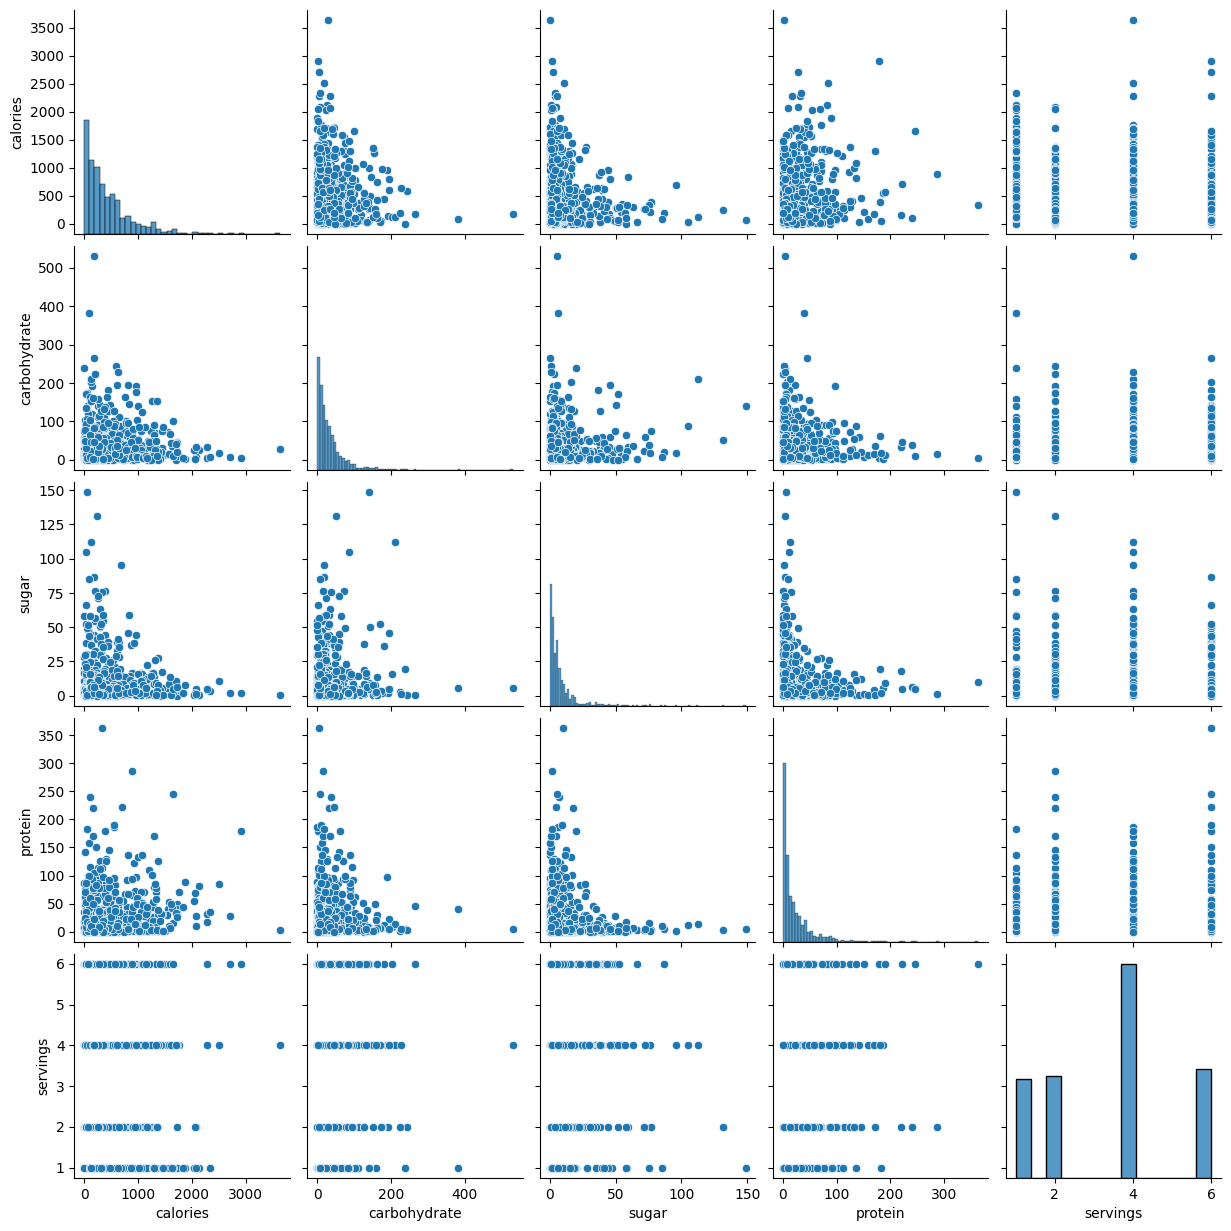

In [20]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

sns.pairplot(numeric_columns)
plt.show()

A heat map to show the linear correlation bewteen numerical columns.

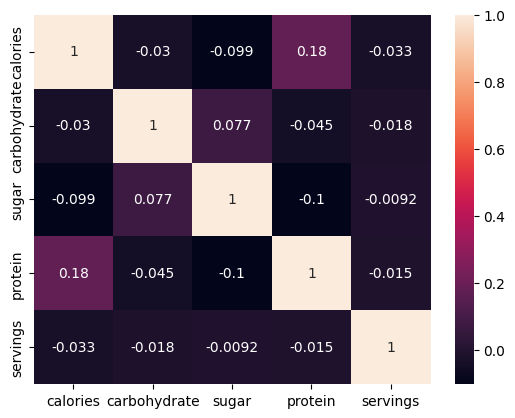

In [21]:
sns.heatmap(df.corr(),annot=True)
plt.savefig('heatmap.png')

As null value in high traffic column mean the recipe didn generate high traffic we replace them with 0 and we replace the value 'High' with 1.

In [22]:
df['high_traffic'] = df['high_traffic'].fillna(0)

In [23]:
df['high_traffic'] = df['high_traffic'].replace('High', 1)

<Figure size 600x600 with 0 Axes>

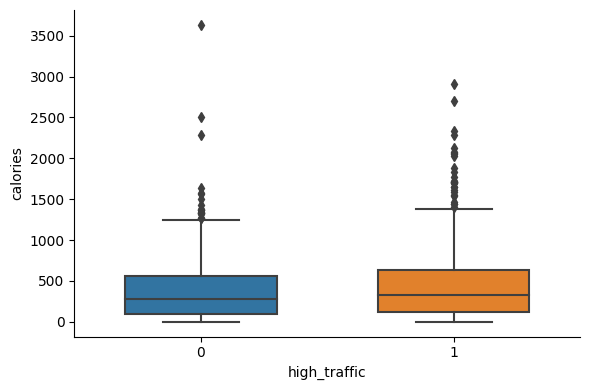

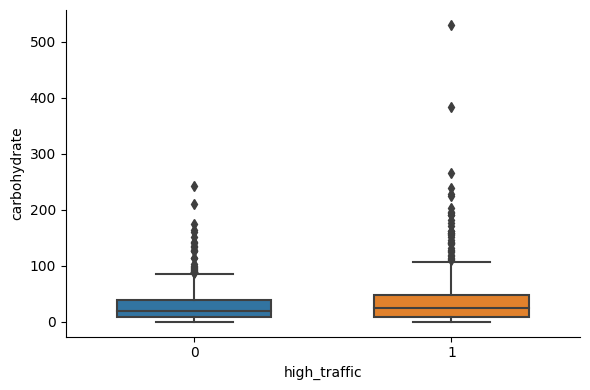

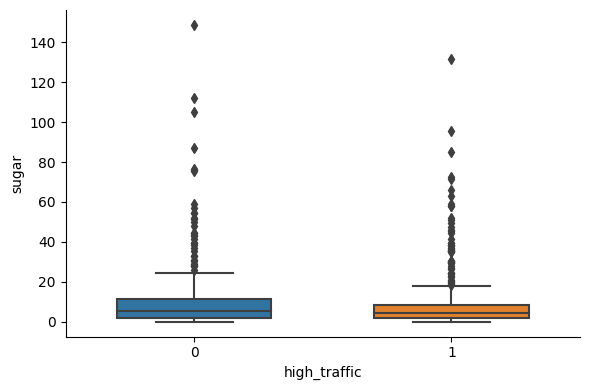

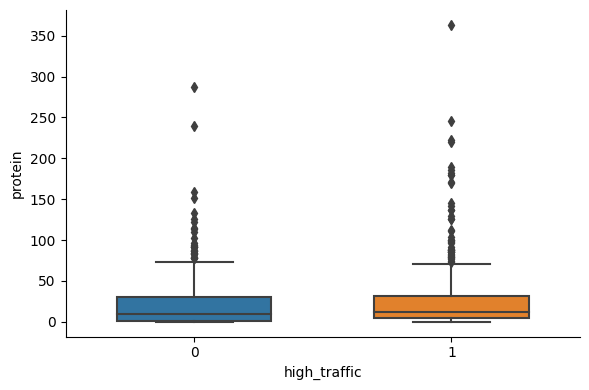

In [24]:
numerical_columns=['calories','carbohydrate','sugar','protein']
plt.figure(figsize=(6, 6))
for column in numerical_columns:
    sns.catplot(data=df, x='high_traffic', y=column, kind='box', height=4, aspect=1.5, width=0.6)
    plt.savefig(f'box_plot_{column}.png')

plt.tight_layout()
plt.show()

In [25]:
def remove_outliers(df, columns, factor=1.5):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function to remove outliers from numeric columns
df = remove_outliers(df, numeric_columns)

Count plot for the Category column.

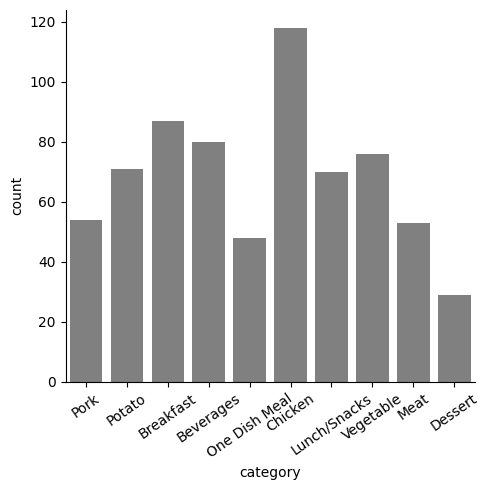

In [26]:
cat_plot = sns.catplot(x="category",
    data=df,
    kind="count",
    color='gray')
cat_plot.set_xticklabels(rotation=35)
plt.tight_layout()
plt.savefig('category_count.png')
plt.show()


Bar plot for the servings column.

In [27]:
value_counts = df['servings'].value_counts()

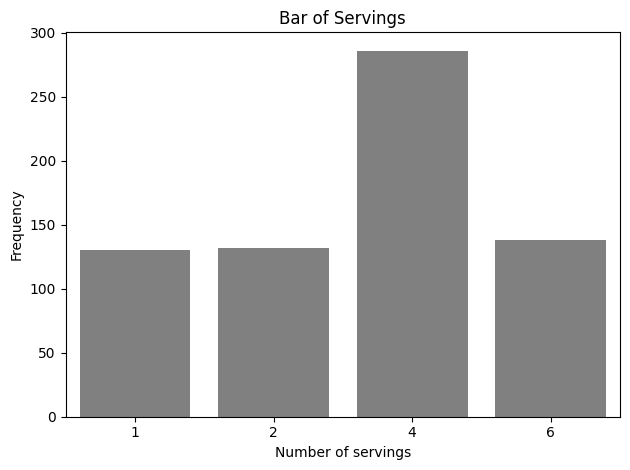

In [28]:
sns.barplot(x=value_counts.index, y=value_counts.values, color='grey')
plt.xlabel('Number of servings')
plt.ylabel('Frequency')
plt.title('Bar of Servings')
plt.tight_layout()
plt.savefig('servings_count.png')
plt.show()


We count how many recipes generated high traffic.

In [29]:
df['high_traffic'].value_counts()

1    407
0    279
Name: high_traffic, dtype: int64

We split the dataset into feature columns and target variable.

In [30]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1].values

In [31]:
X.shape

(686, 6)

In [32]:
y.shape

(686,)

A function that I wrote to scale numerical columns and onehot encode categorical columns.

In [33]:

from sklearn.preprocessing import StandardScaler

def onehot_and_scale(X):
    ''' one-hot encode categorical columns and scale numerical columns
    it returns a numpy array
    '''
    
    assert isinstance(X, pd.core.frame.DataFrame)
         
    numerical_columns = X.select_dtypes(include=['int64', 'float64'])
    categorical_columns = X.select_dtypes(include=['object'])

    if categorical_columns.shape[1] > 0:
        categorical_columns = pd.get_dummies(categorical_columns, drop_first=True)

    if numerical_columns.shape[1] > 0:
        scaler = StandardScaler()
        numerical_columns_scaled = scaler.fit_transform(numerical_columns)
        df_scaled = pd.DataFrame(numerical_columns_scaled, columns=numerical_columns.columns, index=numerical_columns.index)

    else:
       df_scaled = pd.DataFrame(index=numerical_columns.index)

    if categorical_columns.shape[1] > 0:
        df_scaled = pd.concat([df_scaled, categorical_columns], axis=1)
    
    X_col=df_scaled.columns
    X = df_scaled.values

    return X, X_col


In [34]:
X, X_col=onehot_and_scale(X)

We split the data into train set and test set.

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y,random_state = 0)

In [36]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Set seed for reproducibility
SEED = 0

## Decision Random Forest Classifier

In [37]:
df_classifier = RandomForestClassifier(random_state=SEED)

### Randomized Gridsearch to find optimal parameters.

In [38]:
# Basic imports
from sklearn.model_selection import RandomizedSearchCV
# Define a grid of hyperparameter 'params_rf'
param_dist = {
    'n_estimators': np.arange(50, 301, 50),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    df_classifier, 
    param_distributions=param_dist, 
    n_iter=50,  
    scoring='accuracy', 
    cv=5,  
    n_jobs=-1,  
    random_state=42  
)

In [39]:
random_search.fit(X, y)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 9, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Best Score: 0.7492542050142812


### Extract the best hyperparameters.

In [40]:
best_hyperparams = random_search.best_params_
print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'n_estimators': 300, 'min_samples_split': 9, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}


### Extract the best model and evaluate it.

In [41]:
best_model = random_search.best_estimator_
# Predict the test set labels
y_pred = best_model.predict(X_test)
# Evaluate the test set 
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[43 13]
 [ 8 74]]


0.8478260869565217

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        56
           1       0.85      0.90      0.88        82

    accuracy                           0.85       138
   macro avg       0.85      0.84      0.84       138
weighted avg       0.85      0.85      0.85       138



## Finding the feature importance

In [43]:
feature_importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_col, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

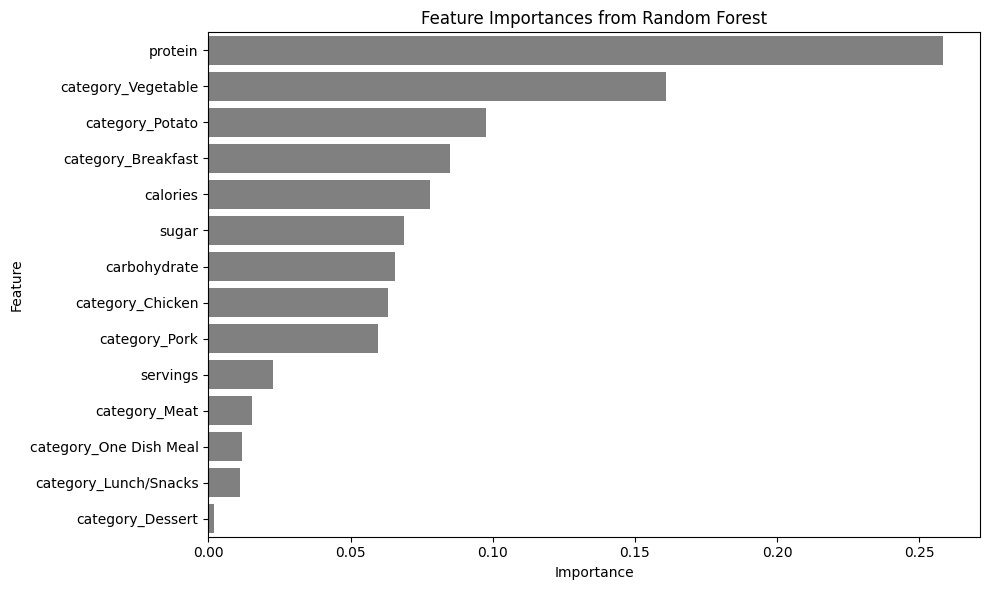

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df,color='gray')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

## k-nearest neighbors

In [45]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN()

### Finding the optimal number of neighbors K.

In [46]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": np.arange(1, 50)}

cv = GridSearchCV(knn, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

print(cv.best_score_)
print(cv.best_params_)

0.6861384487072562
{'n_neighbors': 21}


In [47]:
n_neighbors=cv.best_params_['n_neighbors']
knn = KNN(n_neighbors= n_neighbors)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=21)

### Evaluate the Model

In [48]:
y_pred = knn.predict(X_test)
# Evaluate the test set 
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[29 27]
 [18 64]]


0.6739130434782609

### Classification Report.

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.52      0.56        56
           1       0.70      0.78      0.74        82

    accuracy                           0.67       138
   macro avg       0.66      0.65      0.65       138
weighted avg       0.67      0.67      0.67       138



## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation